Asian and Indian Cuisines

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
pd.__version__

'2.2.2'

In [ ]:
np.__version__

'1.26.4'

In [ ]:
import matplotlib

matplotlib.__version__

'3.8.0'

In [ ]:
import sklearn
sklearn.__version__

'1.5.2'

In [ ]:
sns.__version__

'0.13.2'

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv('cuisines.csv')

In [ ]:
data.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.shape

(2448, 385)

In [ ]:
data.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
cuisine,0
almond,0
angelica,0
anise,0
...,...
wood,0
yam,0
yeast,0
yogurt,0


<Axes: xlabel='cuisine'>

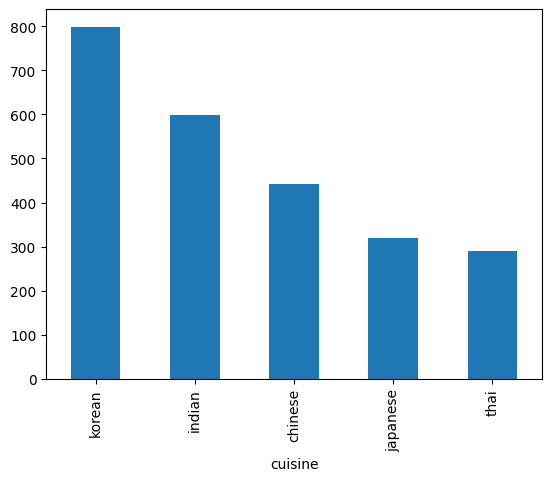

In [ ]:
data.cuisine.value_counts().plot.bar()

In [ ]:
indian = data[data.cuisine == 'indian']
thai = data[data.cuisine == 'thai']
chinese = data[data.cuisine == 'chinese']
japanese = data[data.cuisine == 'japanese']
korean = data[data.cuisine == 'korean']

In [ ]:
print('korean:',korean.shape,'\n','indian:',indian.shape,'\n','chinese:',chinese.shape,'\n','thai:',thai.shape,'\n','japanese:',japanese.shape)

korean: (799, 385) 
 indian: (598, 385) 
 chinese: (442, 385) 
 thai: (289, 385) 
 japanese: (320, 385)


In [ ]:
def create_ingredient_df(df):
    ingredient_df = data.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

In [ ]:
#this is the function which i have created of my understading which is  similar to above function
def ingre(data):
  data = data.T.drop(['cuisine','Unnamed: 0'],axis = 0).sum(axis = 1).to_frame('total')
  data = data[(data.T != 0).any()]
  data.sort_values(by = 'total',ascending = False,inplace = True)
  return data

In [ ]:
indian_ingre = ingre(indian)
thai_ingre = ingre(thai)
japanese_ingre = ingre(japanese)
chinese_ingre = ingre(chinese)
korean_ingre = ingre(korean)

<Axes: >

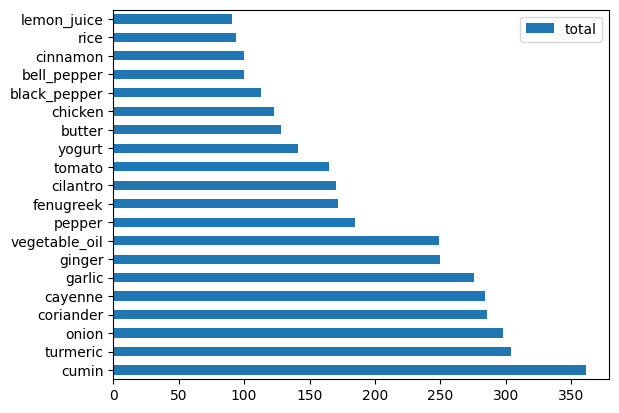

In [ ]:
#now lets plot the ingredients of the five countries
indian_ingre.head(20).plot.barh()

cumin,turmeric,onion,coriender,cayenne,garlic,ginger are the most incredients used in any kind of Indian food.

<Axes: >

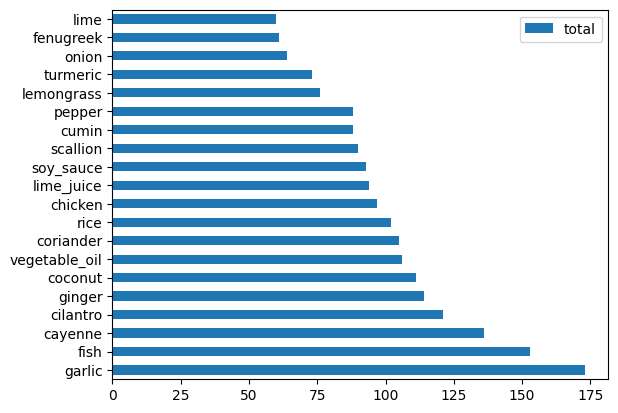

In [ ]:
thai_ingre.head(20).plot.barh()

garlic,fish,cayenne,cilantro,cocnut are commonly used food ingredients.

<Axes: >

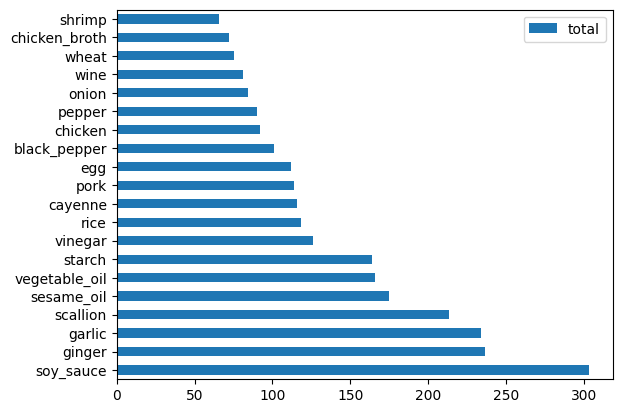

In [ ]:
chinese_ingre.head(20).plot.barh()

<Axes: >

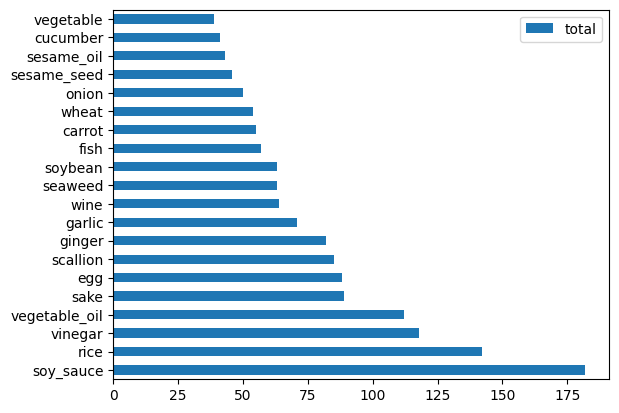

In [ ]:
japanese_ingre.head(20).plot.barh()

<Axes: >

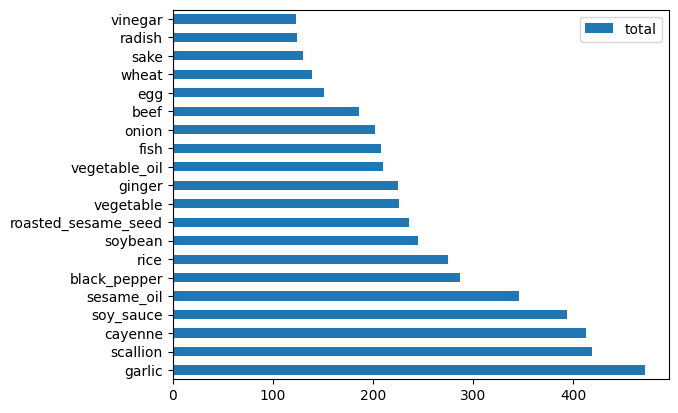

In [ ]:
korean_ingre.head(20).plot.barh()

In [ ]:
#ginger,garlice,rice are common in food all five countries in the dataset so we will remove them from the dataset.
feature_df = data.drop(['Unnamed: 0','cuisine','ginger','garlic','rice'],axis = 1)
label = data.cuisine

In [ ]:
feature_df.head()


,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='cuisine'>

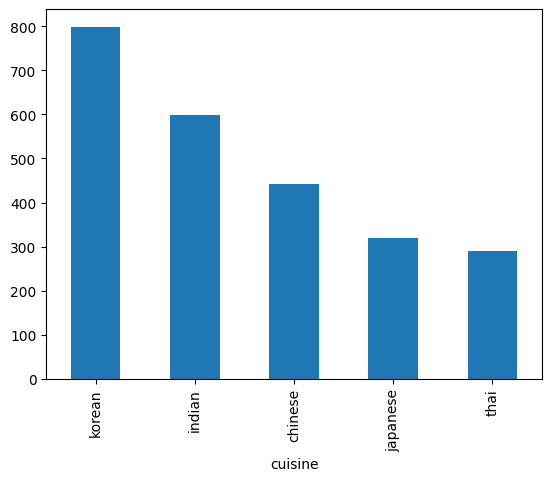

In [ ]:
label.value_counts().plot.bar()

In [ ]:
class_counts = label.value_counts()
min_samples = class_counts.min()
oversample = SMOTE(k_neighbors = min(min_samples - 1,5))
t_feature,t_label = oversample.fit_resample(feature_df,label)
t_feature = pd.DataFrame(t_feature)
t_label = pd.DataFrame(t_label)

In [ ]:
print('new label count:',t_label.value_counts())

new label count: cuisine 
chinese     799
indian      799
japanese    799
korean      799
thai        799
Name: count, dtype: int64


In [ ]:
print('old label count:',data.cuisine.value_counts())

old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [ ]:
joined = pd.concat([t_feature,t_label],axis = 1,join = 'outer')
joined.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,indian


In [ ]:
joined.info()
joined.to_csv('clean_cuisine.csv')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, almond to cuisine
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [ ]:

clean = joined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np



In [ ]:
cuisine_data = clean['cuisine']

In [ ]:
cuisine_data.head()

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian


In [ ]:
cuisine_data

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian
...,...
3990,thai
3991,thai
3992,thai
3993,thai


In [ ]:
features = clean.drop(['cuisine'],axis = 1)

In [ ]:
features.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
features.columns.tolist()

['almond',
 'angelica',
 'anise',
 'anise_seed',
 'apple',
 'apple_brandy',
 'apricot',
 'armagnac',
 'artemisia',
 'artichoke',
 'asparagus',
 'avocado',
 'bacon',
 'baked_potato',
 'balm',
 'banana',
 'barley',
 'bartlett_pear',
 'basil',
 'bay',
 'bean',
 'beech',
 'beef',
 'beef_broth',
 'beef_liver',
 'beer',
 'beet',
 'bell_pepper',
 'bergamot',
 'berry',
 'bitter_orange',
 'black_bean',
 'black_currant',
 'black_mustard_seed_oil',
 'black_pepper',
 'black_raspberry',
 'black_sesame_seed',
 'black_tea',
 'blackberry',
 'blackberry_brandy',
 'blue_cheese',
 'blueberry',
 'bone_oil',
 'bourbon_whiskey',
 'brandy',
 'brassica',
 'bread',
 'broccoli',
 'brown_rice',
 'brussels_sprout',
 'buckwheat',
 'butter',
 'buttermilk',
 'cabbage',
 'cabernet_sauvignon_wine',
 'cacao',
 'camembert_cheese',
 'cane_molasses',
 'caraway',
 'cardamom',
 'carnation',
 'carob',
 'carrot',
 'cashew',
 'cassava',
 'catfish',
 'cauliflower',
 'caviar',
 'cayenne',
 'celery',
 'celery_oil',
 'cereal',
 'c

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,cuisine_data,test_size = 0.3)

In [ ]:
lr = LogisticRegression(multi_class = 'ovr',solver = 'liblinear')
model = lr.fit(X_train,np.ravel(y_train))
accuracy = model.score(X_test,y_test)
print('accuracy of our model:',accuracy*100)

accuracy of our model: 81.56797331109257


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
lr = LogisticRegression(multi_class = 'ovr',solver = 'lbfgs')
model = lr.fit(X_train,np.ravel(y_train))
accuracy = model.score(X_test,y_test)
print('accuracy of our model:',accuracy*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy of our model: 81.56797331109257


In [ ]:
print(f'ingredients: {X_test.iloc[60][X_test.iloc[60]!=0].keys()}')
print(f'cuisine: {y_test.iloc[60]}')

ingredients: Index(['beef', 'celery', 'chicken_broth', 'green_bell_pepper', 'mushroom',
       'nut', 'onion', 'oyster', 'pea', 'pepper', 'pork', 'soy_sauce',
       'starch', 'vegetable_oil'],
      dtype='object')
cuisine: chinese


In [ ]:
print(f'ingredients: {X_test.iloc[150][X_test.iloc[150]!=0].keys()}')
print(f'cuisine: {y_test.iloc[150]}')

ingredients: Index(['beef', 'celery', 'chicken_broth', 'mushroom', 'nut', 'onion',
       'scallion', 'soy_sauce', 'starch', 'vegetable_oil'],
      dtype='object')
cuisine: japanese


In [ ]:
print(f'ingredients: {X_test.iloc[15][X_test.iloc[15]!=0].keys()}')
print(f'cuisine: {y_test.iloc[15]}')

ingredients: Index(['brown_rice', 'cayenne', 'olive_oil', 'onion', 'peanut_butter',
       'tomato'],
      dtype='object')
cuisine: indian


In [ ]:
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

     chinese       0.77      0.75      0.76       229
      indian       0.91      0.88      0.89       260
    japanese       0.80      0.76      0.78       251
      korean       0.81      0.78      0.79       223
        thai       0.79      0.90      0.84       236

    accuracy                           0.82      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.82      0.82      0.82      1199



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,precision_recall_curve
import numpy as np

In [ ]:
#linear_svc
classifier = SVC(kernel = 'linear',C = 10,probability = True,random_state = 0)
classifier.fit(X_train,np.ravel(y_train))
y_predict = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('prediction:',y_predict)
print('accuracy:',accuracy*100 )
print(classification_report(y_test,y_predict))

prediction: ['thai' 'japanese' 'chinese' ... 'korean' 'thai' 'thai']
accuracy: 80.15012510425355
              precision    recall  f1-score   support

     chinese       0.74      0.77      0.75       229
      indian       0.87      0.85      0.86       260
    japanese       0.80      0.77      0.79       251
      korean       0.84      0.75      0.79       223
        thai       0.77      0.85      0.81       236

    accuracy                           0.80      1199
   macro avg       0.80      0.80      0.80      1199
weighted avg       0.80      0.80      0.80      1199



In [ ]:
import pickle
with open('logistic_regression.pkl','wb') as file:
  pickle.dump(classifier,file)

In [ ]:
classifier1 = SVC()
print('name:',SVC())
classifier1.fit(X_train,np.ravel(y_train))
y_predict = classifier1.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('prediction:',y_predict)
print('accuracy:',accuracy*100 )
print(classification_report(y_test,y_predict))

name: SVC()
prediction: ['thai' 'japanese' 'chinese' ... 'korean' 'thai' 'thai']
accuracy: 82.98582151793161
              precision    recall  f1-score   support

     chinese       0.77      0.79      0.78       229
      indian       0.89      0.89      0.89       260
    japanese       0.86      0.77      0.81       251
      korean       0.85      0.78      0.82       223
        thai       0.79      0.91      0.84       236

    accuracy                           0.83      1199
   macro avg       0.83      0.83      0.83      1199
weighted avg       0.83      0.83      0.83      1199



In [ ]:
with open('support_vector_classifier.pkl','wb') as file:
  pickle.dump(classifier1,file)

In [ ]:
classifier2 = KNeighborsClassifier(10)
print('name:',KNeighborsClassifier(10))
classifier2.fit(X_train,np.ravel(y_train))
y_predict = classifier2.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('prediction:',y_predict)
print('accuracy:',accuracy*100 )
print(classification_report(y_test,y_predict))

name: KNeighborsClassifier(n_neighbors=10)
prediction: ['thai' 'japanese' 'chinese' ... 'korean' 'thai' 'thai']
accuracy: 73.2276897414512
              precision    recall  f1-score   support

     chinese       0.67      0.69      0.68       229
      indian       0.85      0.82      0.83       260
    japanese       0.63      0.78      0.70       251
      korean       0.89      0.52      0.66       223
        thai       0.73      0.83      0.78       236

    accuracy                           0.73      1199
   macro avg       0.75      0.73      0.73      1199
weighted avg       0.75      0.73      0.73      1199



In [ ]:
with open('KNeighbors.pkl','wb') as file:
  pickle.dump(classifier2,file)

In [ ]:
classifier3 = RandomForestClassifier(n_estimators=100)
print('name:',RandomForestClassifier(n_estimators=100))
classifier3.fit(X_train,np.ravel(y_train))
y_predict = classifier3.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('prediction:',y_predict)
print('accuracy:',accuracy*100 )
print(classification_report(y_test,y_predict))

name: RandomForestClassifier()
prediction: ['thai' 'japanese' 'chinese' ... 'korean' 'indian' 'thai']
accuracy: 84.23686405337781
              precision    recall  f1-score   support

     chinese       0.76      0.82      0.79       229
      indian       0.87      0.92      0.89       260
    japanese       0.88      0.80      0.84       251
      korean       0.85      0.80      0.82       223
        thai       0.85      0.87      0.86       236

    accuracy                           0.84      1199
   macro avg       0.84      0.84      0.84      1199
weighted avg       0.84      0.84      0.84      1199



In [ ]:
with open('random_forest.pkl','wb') as file:
  pickle.dump(classifier3,file)

In [ ]:
feature_importance = classifier3.feature_importances_

In [ ]:
feature_importance

array([2.27829125e-03, 0.00000000e+00, 9.80306171e-07, 6.36345423e-04,
       8.76013279e-04, 0.00000000e+00, 8.40979916e-04, 0.00000000e+00,
       1.02674330e-03, 0.00000000e+00, 8.40987206e-04, 1.12278278e-03,
       9.55055761e-04, 0.00000000e+00, 0.00000000e+00, 5.27123008e-04,
       1.00721177e-02, 0.00000000e+00, 4.79134557e-03, 1.19145474e-03,
       6.43547155e-03, 7.09056821e-05, 1.14983769e-02, 2.60885569e-03,
       7.91190594e-05, 1.34553906e-04, 1.56878244e-04, 9.70396947e-03,
       0.00000000e+00, 2.51287029e-04, 1.68986308e-04, 1.16863420e-03,
       0.00000000e+00, 5.04259897e-04, 2.13002217e-02, 0.00000000e+00,
       1.65949078e-03, 6.52934520e-04, 3.63005534e-05, 0.00000000e+00,
       0.00000000e+00, 5.86024417e-05, 4.21727061e-04, 0.00000000e+00,
       1.22542051e-04, 4.81183921e-04, 2.51552293e-03, 1.03906066e-03,
       7.45763073e-04, 0.00000000e+00, 1.37357886e-03, 1.09698916e-02,
       1.08492373e-03, 4.13655687e-03, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
imp_data = pd.DataFrame({'feature':X_train.columns,'importance':feature_importance})

In [ ]:
imp_data = imp_data.sort_values(by = 'importance',ascending = False)

In [ ]:
imp_data.head(20)

,feature,importance
327,soy_sauce,0.035960
290,roasted_sesame_seed,0.031521
68,cayenne,0.029998
129,fish,0.029716
334,starch,0.028325
313,sesame_oil,0.027977
308,scallion,0.025949
362,vinegar,0.024703
112,cumin,0.023968
95,coconut,0.022351


In [ ]:
classifier4 = AdaBoostClassifier(n_estimators=100)
print('name:',AdaBoostClassifier(n_estimators=100))
classifier4.fit(X_train,np.ravel(y_train))
y_predict = classifier4.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('prediction:',y_predict)
print('accuracy:',accuracy*100 )
print(classification_report(y_test,y_predict))

name: AdaBoostClassifier(n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


prediction: ['thai' 'chinese' 'korean' ... 'korean' 'thai' 'thai']
accuracy: 70.22518765638031
              precision    recall  f1-score   support

     chinese       0.59      0.54      0.56       229
      indian       0.83      0.80      0.82       260
    japanese       0.65      0.59      0.62       251
      korean       0.68      0.74      0.71       223
        thai       0.73      0.83      0.78       236

    accuracy                           0.70      1199
   macro avg       0.70      0.70      0.70      1199
weighted avg       0.70      0.70      0.70      1199



In [ ]:
with open('adabosst_classifier.pkl','wb') as file:
  pickle.dump(classifier4,file)

In [ ]:
!python --verison

unknown option --verison
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [ ]:
import sys
sys.version

'3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]'

In [ ]:
!python --version

Python 3.10.12
